## 作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。
* Q1: 透過數值法計算  Age 和  Survived  是否有相關性?
* Q2:透過數值法計算  Sex 和 Survived  是否有相關性?
* Q3: 透過數值法計算  Age 和  Fare 是否有相關性?   
* 提示:    
1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
2.把題目中的 Survived 用 Survived_cate 來做分析       
3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     


In [3]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display


import sklearn  
%matplotlib inline

## 讀入資料

In [6]:
df_train = pd.read_csv(r'D:\ML100\Day38\Titanic_train (1).csv')
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [41]:
## 這邊我們做一個調整，把 Survived 變成離散型變數 Survived_cate
#df_train['Survived_cate'] = str(df_train['Survived'])  這個不行轉
df_train['Survived_cate'] = df_train['Survived'].astype(str)
print(df_train['Survived'])
print(df_train['Survived_cate'])

#取無遺失值的資料集

df_train_c1 = df_train[['Age','Survived_cate']].dropna()
df_train_c1.info()

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived_cate, Length: 891, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            714 non-null    float64
 1   Survived_cate  714 non-null    object 
dtypes: float64(1), object(1)
memory usage: 16.7+ KB


###  Q1: 透過數值法計算  Age 和  Survived  是否有相關性?


In [11]:
!pip install pingouin

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

  Created wheel for pingouin: filename=pingouin-0.3.10-py3-none-any.whl size=203403 sha256=37cc7443ed2762b9b12d5700c5892a9fea487527af235cc69b4a28d071336092
  Stored in directory: c:\users\112178\appdata\local\pip\cache\wheels\26\7e\4b\d7815d18674094caa0d58cc40bb6a595b4a2e67ada30e2d42d
  Created wheel for outdated: filename=outdated-0.2.0-py3-none-any.whl size=4964 sha256=b734c1d5a19510478163ce9a62f7c011db8b64b67260ee868ba9a6085b8bb72c
  Stored in directory: c:\users\112178\appdata\local\pip\cache\wheels\2d\4f\c9\062da6e68841f60d0c3434980775671daaa07a574110567de6
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7054 sha256=065aaac9fd42c8e9912c848afbc78612715dea52ed863430e97390ed59810e5b
  Stored in directory: c:\users\112178\appdata\local\pip\cache\wheels\6a\33\c4\0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingou

In [42]:
#從etaSq值顯示，存活跟年齡關係很薄弱
import pingouin as pg

aov = pg.anova(dv='Age', between='Survived_cate', data=df_train_c1, detailed=True)
aov

etaSq = aov.SS[0]/(aov.SS[0] + aov.SS[1])
etaSq

0.0059630974469252

### Q2:透過數值法計算  Sex 和 Survived  是否有相關性?


In [22]:
!pip install researchpy

import researchpy

In [44]:
#Cramer’s V係數結果顯示，存活和性別有高度相關

df_train_c2 = df_train[['Sex','Survived_cate']].dropna()
df_train_c2.info()

#1.用交叉列連表整理資料
contTable = pd.crosstab(df_train_c2['Sex'],df_train_c2['Survived_cate'])
contTable

#2.計算自由度
df = min(contTable.shape[0],contTable.shape[1])-1
print("df=",df)
#3.運用researchpy 套件，計算出 Cramer’s V 係數
crosstab, res = researchpy.crosstab(df_train_c2['Sex'],df_train_c2['Survived_cate'], test='chi-square')

res.loc[2, 'results']
print("Cramer’s V 係數為",res.loc[2, 'results'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sex            891 non-null    object
 1   Survived_cate  891 non-null    object
dtypes: object(2)
memory usage: 20.9+ KB
df= 1
Cramer’s V 係數為 0.5434


In [31]:
#res.iloc[1]

Chi-square test    p-value = 
results                     0
Name: 1, dtype: object

### Q3: 透過數值法計算  Age 和  Fare 是否有相關性?  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   Fare    714 non-null    float64
dtypes: float64(2)
memory usage: 16.7 KB
0.0960666917690389


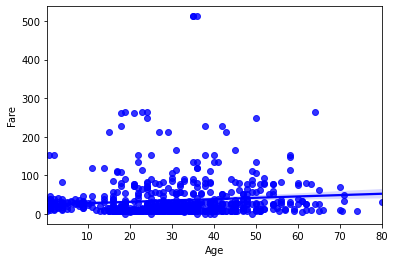

In [48]:
#由皮爾森相關係數可知年齡與票價低度線性相關
df_train_c3 = df_train[['Age','Fare']].dropna()
df_train_c3.info()

corr, _=stats.pearsonr(df_train_c3['Age'],df_train_c3['Fare'])
print(corr)

g = sns.regplot(x="Age", y="Fare", color="b", data=df_train_c3)